In [28]:
%pylab ipympl
%matplotlib inline
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

Populating the interactive namespace from numpy and matplotlib


In [29]:
from scipy import optimize

In [30]:
theta = linspace(0,2*pi,100)
r = 1
x_rng = r*cos(theta)
y_rng = r*sin(theta)

In [31]:
N = 13 #number of point 
alpha = (2*pi)/N #step size between points 

locangle = arange(0,2*pi,alpha) #angle where the point charges are located 
xloc = r*cos(locangle)
yloc = r*sin(locangle)
#xloc**2 + yloc**2 =  1

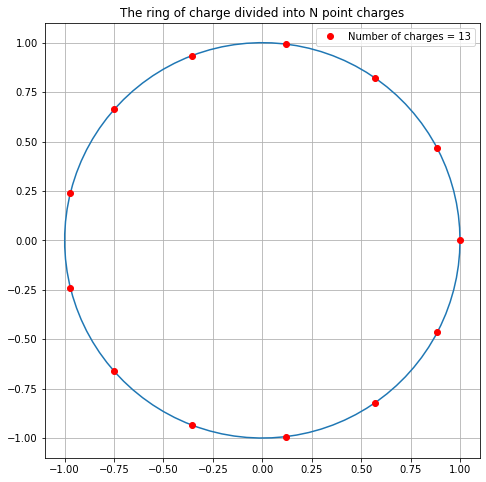

In [43]:
close(1);figure(1,figsize=(8, 8))
title('The ring of charge divided into N point charges')
plot(x_rng,y_rng)
plot(xloc,yloc,'or',label='Number of charges = {}'.format(N))
plt.gca().set_aspect('equal', adjustable='box')
grid()
legend()

# Parts B and C - Functions

In [33]:
def dimlssW(N):
    ''' Dimensionless Work needed to asseemble the ring with N point charges
    '''
    summ =0
    for k in range(1,N-1):
        term = sin( (pi/N)*k )
        summ = summ + 1/term
    return (1/N)*summ

In [34]:
def fitfunc( N , a, b, c ):
    ''' Fit function for the work to assemble ring 
    '''
    term = (log(N))**b
    return a*(term) + c

# Part B: 2 < N < 25

In [35]:
Nary = arange(2,25+1)#array of N values in the specified range
W = [dimlssW(i) for i in Nary] #Work to assemble N charges for all N in range

In [36]:
a,b,c = optimize.curve_fit(fitfunc,Nary,W)[0]
print('In the range 2<N<25, the optimized fit parameters are (a,b,c)=({:.2f},{:.2f},{:.2f})'.format(a,b,c))

In the range 2<N<25, the optimized fit parameters are (a,b,c)=(1.14,0.72,-0.86)


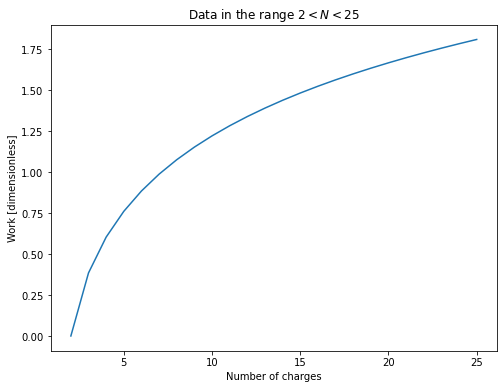

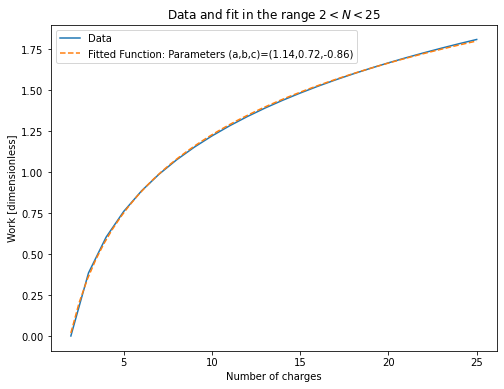

In [45]:
close(2);figure(2,figsize=(8, 6))
title('Data in the range $2<N<25$')
plot(Nary,W)
xlabel('Number of charges');ylabel('Work [dimensionless]')

close(3);figure(3,figsize=(8, 6))
x=linspace(2,25)
title('Data and fit in the range $2<N<25$')
plot(Nary,W,label='Data')
plot(x,fitfunc(x,a,b,c),'--',label='Fitted Function: Parameters (a,b,c)=({:.2f},{:.2f},{:.2f})'.format(a,b,c))
xlabel('Number of charges');ylabel('Work [dimensionless]')
legend()

# Part C: 100 < N < 1000

In [38]:
Naryc = arange(100,1000+1)#array of N values in the specified range
Wc = [dimlssW(i) for i in Naryc] #Work to assemble N charges for all N in range

In [39]:
ac,bc,cc = optimize.curve_fit(fitfunc,Naryc,Wc)[0]
print('In the range 100<N<1000, the optimized fit parameters are (a,b,c)=({:.2f},{:.2f},{:.2f})'.format(ac,bc,cc))

In the range 100<N<1000, the optimized fit parameters are (a,b,c)=(0.64,1.00,-0.24)


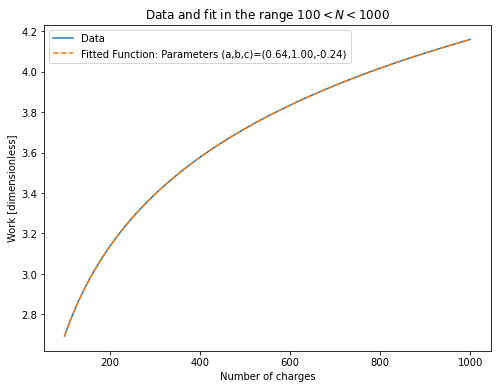

In [46]:
close(4);figure(4,figsize=(8, 6))
xc=linspace(100,1000)
title('Data and fit in the range $100<N<1000$')
plot(Naryc,Wc,label='Data')
plot(xc,fitfunc(xc,ac,bc,cc),'--',label='Fitted Function: Parameters (a,b,c)=({:.2f},{:.2f},{:.2f})'.format(ac,bc,cc))
xlabel('Number of charges');ylabel('Work [dimensionless]')
legend()

In the range $100<N<1000$, the function fits the data much better. In the range $2<N<25$, the function fits the data well overall, but deviates in a few locations. 